In [2]:
# convert txt ljspeech files to tokens fairseq mt tokens

In [19]:
import os

In [22]:
# characters
vocab_size = 200
endding = "_noisy_v1"  

In [1]:
"""
out_dir = f"data/ljspeech_hubert{vocab_size}{endding}"
assert not os.path.isdir(out_dir), print("Dir exists")

os.makedirs(out_dir)

for split in ["train", "val", "test"]:
    unit_wf_path = f"{out_dir}/{split}.unit"
    char_wf_path = f"{out_dir}/{split}.char"
    
    unit_wf = open(unit_wf_path, "w")
    char_wf = open(char_wf_path, "w")

    with open(f"../datasets/LJSpeech/hubert/{split}{vocab_size}{endding}.txt", "r") as f:
        for line in f:
            utter_dict = eval(line.strip("\n"))
            unit = utter_dict["hubert"]
            text = utter_dict["transcription"]
            char = text.replace(" ", "|")
            char = (" ").join(char)
            unit_wf.write(unit+"\n")
            char_wf.write(char+"\n")

    unit_wf.close()
    char_wf.close()
"""

'\nout_dir = f"data/ljspeech_hubert{vocab_size}{endding}"\nassert not os.path.isdir(out_dir), print("Dir exists")\n\nos.makedirs(out_dir)\n\nfor split in ["train", "val", "test"]:\n    unit_wf_path = f"{out_dir}/{split}.unit"\n    char_wf_path = f"{out_dir}/{split}.char"\n    \n    unit_wf = open(unit_wf_path, "w")\n    char_wf = open(char_wf_path, "w")\n\n    with open(f"../datasets/LJSpeech/hubert/{split}{vocab_size}{endding}.txt", "r") as f:\n        for line in f:\n            utter_dict = eval(line.strip("\n"))\n            unit = utter_dict["hubert"]\n            text = utter_dict["transcription"]\n            char = text.replace(" ", "|")\n            char = (" ").join(char)\n            unit_wf.write(unit+"\n")\n            char_wf.write(char+"\n")\n\n    unit_wf.close()\n    char_wf.close()\n'

In [98]:
vocab_size = 200
endding = ""  

In [99]:
out_dir = f"data/libritts_train-clean-100_hubert{vocab_size}{endding}"
assert not os.path.isdir(out_dir), print("Dir exists")

os.makedirs(out_dir)

for split in ["train", "val", "test"]:
    unit_wf_path = f"{out_dir}/{split}.unit"
    char_wf_path = f"{out_dir}/{split}.char"
    
    unit_wf = open(unit_wf_path, "w")
    char_wf = open(char_wf_path, "w")

    with open(f"../datasets/LibriTTS_train-clean-100/hubert/{split}{vocab_size}{endding}.txt", "r") as f:
        for line in f:
            utter_dict = eval(line.strip("\n"))
            unit = utter_dict["hubert"]
            if len(unit.split(" ")) > 600:
                continue
                
            if len(unit.split(" ")) < 50:
                continue
                
            text = utter_dict["transcription"]
            char = text.replace(" ", "|")
            char = (" ").join(char)
            unit_wf.write(unit+"\n")
            char_wf.write(char+"\n")

    unit_wf.close()
    char_wf.close()

In [82]:
ls1 = []
with open("data/libritts_train-clean-100_hubert200/train.char", "r") as f:
    for line in f:
        l = len(line.strip("\n").split(" "))
        ls1.append(l)
        
ls2 = []
with open("data/libritts_train-clean-100_hubert200/train.unit", "r") as f:
    for line in f:
        l = len(line.strip("\n").split(" "))
        ls2.append(l)

In [83]:
ls = np.array(ls2) / np.array(ls1)

In [92]:
ls1[26425]

137

In [91]:
print(np.argmax(ls))

26425


In [93]:
len("W e | a r e | t o u c h e d | w i t h | e m o t i o n s | o f | t e n d e r n e s s | a n d | c o m p l a c e n c y , | b u t | w e | c a n n o t | f i n d | w h e r e a t | t h i s | d a i n t y | e m o t i o n , | t h i s | w a n d e r i n g | g l e a m , | p o i n t s .")

273

In [85]:
import numpy as np

In [86]:
import matplotlib.pyplot as plt

In [87]:
ls.sort()

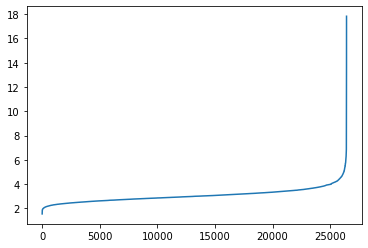

In [88]:
plt.plot(ls)

In [59]:
np.sum(np.array(ls2) > 600)

2710

In [33]:
len(ls)

1185

In [21]:
vocab_size = 200

In [2]:
"""
# check matches with original
gt_dict = {}
with open(f"/projects/bbmx/junkaiwu/LJSpeech-1.1/wavs_16khz/hubert_l6_v{vocab_size}.km", "r") as f:
    for line in f:
        gt_dict[line.split("|")[0]] = {}
        gt_dict[line.split("|")[0]]["unit"] = line.split("|")[1].strip("\n")
        
with open(f"/projects/bbmx/junkaiwu/LJSpeech-1.1/metadata.csv", "r") as f:
    for line in f:
        gt_dict[line.split("|")[0]]["transcription_raw"] = line.split("|")[1].strip("\n")
        gt_dict[line.split("|")[0]]["transcription"] = line.split("|")[2].strip("\n")
        
for split in ["train", "val", "test"]:
    with open(f"../datasets/LJSpeech/hubert/{split}{vocab_size}.txt", "r") as f:
        for line in f:
            utter_dict = eval(line.strip("\n"))
            assert utter_dict["hubert"] == gt_dict[utter_dict["audio"]]["unit"]
            assert utter_dict["transcription"] == gt_dict[utter_dict["audio"]]["transcription"]
            assert utter_dict["transcription_raw"] == gt_dict[utter_dict["audio"]]["transcription_raw"]
            
for split in ["train", "val", "test"]:
    chars = []
    units = []
    with open(f"data/ljspeech_hubert{vocab_size}/{split}.char", "r") as f:
        for line in f:
            chars.append(line.strip("\n"))

    with open(f"data/ljspeech_hubert{vocab_size}/{split}.unit", "r") as f:
        for line in f:
            units.append(line.strip("\n"))
    
    with open(f"../datasets/LJSpeech/hubert/{split}{vocab_size}.txt", "r") as f:
        for i, line in enumerate(f):
            utter_dict = eval(line.strip("\n"))
            assert utter_dict["hubert"] == units[i]
            assert utter_dict["transcription"] == chars[i].replace(" ", "").replace("|", " "), print(chars[i].replace(" ", "").replace("|", "")) 
"""

'\n# check matches with original\ngt_dict = {}\nwith open(f"/projects/bbmx/junkaiwu/LJSpeech-1.1/wavs_16khz/hubert_l6_v{vocab_size}.km", "r") as f:\n    for line in f:\n        gt_dict[line.split("|")[0]] = {}\n        gt_dict[line.split("|")[0]]["unit"] = line.split("|")[1].strip("\n")\n        \nwith open(f"/projects/bbmx/junkaiwu/LJSpeech-1.1/metadata.csv", "r") as f:\n    for line in f:\n        gt_dict[line.split("|")[0]]["transcription_raw"] = line.split("|")[1].strip("\n")\n        gt_dict[line.split("|")[0]]["transcription"] = line.split("|")[2].strip("\n")\n        \nfor split in ["train", "val", "test"]:\n    with open(f"../datasets/LJSpeech/hubert/{split}{vocab_size}.txt", "r") as f:\n        for line in f:\n            utter_dict = eval(line.strip("\n"))\n            assert utter_dict["hubert"] == gt_dict[utter_dict["audio"]]["unit"]\n            assert utter_dict["transcription"] == gt_dict[utter_dict["audio"]]["transcription"]\n            assert utter_dict["transcription

In [30]:
ckpt=40
beam=5

preds = []
names = []

name2text = combine_json_files(["../datasets/LJSpeech/ljspeech.json"], None)

text2name = {name2text[key]["char"]:key for key in name2text}

w_f = open(f"data-bin/ljspeech_hubert200/preds_{ckpt}_{beam}.txt", "w")

with open(f"data-bin/ljspeech_hubert200/results_{ckpt}_{beam}.txt", "r") as f:
    for i, line in enumerate(f):
        if line[0] == "S":
            text = line.split("\t")[1].strip("\n").replace(" ", "").replace("|", " ")
            name = text2name[text]
            
            names.append(name)

        if line[0] == "H":
            pred = line.split("\t")[2].strip("\n")
            preds.append(pred)

assert len(preds) == len(names) == 600

for i in range(len(preds)): 
    utter_dict = {}
    utter_dict["audio"] = names[i]
    utter_dict["hubert"] = preds[i]
    w_f.write(str(utter_dict)+"\n")
        
w_f.close()

In [ ]:
text2name

In [9]:
sources[0]

'also their constant employment in labor appropriate to their condition.'

In [10]:
aaa = {"1":"a", "2":"b"}

In [11]:
{aaa[key]:key for key in aaa}

{'a': '1', 'b': '2'}

In [12]:
import json

In [22]:
def combine_json_files(json_files, store_path, store=False):
    # make sure they dont have same keys!
    import json
    from os.path import join, basename, dirname, isfile
    dicts = []
    for json_file in json_files:
        with open(json_file) as f:
            dicts.append(json.load(f))
            
    for i in range(1, len(dicts)):
        dicts[0].update(dicts[i])
        
    if store and not isfile(store_path):
        with open(store_path, "w") as f:
            json.dump(dicts[0], f)
        
    return dicts[0]

In [31]:
not 1 == 2 or not 3 == 4 or not 4 == 4

True

In [32]:
name2text = combine_json_files(["../datasets/LJSpeech/ljspeech.json"], None)

In [33]:
len(name2text)

13100

In [34]:
len(['|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z'])

28

In [5]:
print({26: {'cer': 0.4314, 'bleu1': 0.7502, 'bleu2': 0.6745, 'bleu3': 0.5904, 'bleu4': 0.5069, "wer":11.97}})
print({31: {'cer': 0.4197, 'bleu1': 0.7421, 'bleu2': 0.6674, 'bleu3': 0.5829, 'bleu4': 0.4986, "wer":11.28}})
print({40: {'cer': 0.4077, 'bleu1': 0.7381, 'bleu2': 0.6632, 'bleu3': 0.5788, 'bleu4': 0.4944, "wer":10.37}})

{26: {'cer': 0.4314, 'bleu1': 0.7502, 'bleu2': 0.6745, 'bleu3': 0.5904, 'bleu4': 0.5069, 'wer': 11.97}}
{31: {'cer': 0.4197, 'bleu1': 0.7421, 'bleu2': 0.6674, 'bleu3': 0.5829, 'bleu4': 0.4986, 'wer': 11.28}}
{40: {'cer': 0.4077, 'bleu1': 0.7381, 'bleu2': 0.6632, 'bleu3': 0.5788, 'bleu4': 0.4944, 'wer': 10.37}}


In [ ]:
fairseq-preprocess --source-lang char --target-lang unit \
    --trainpref /home/junkaiwu/ECE537_Final_Project/text2unit_fairseq/data/libritts_train-clean-100_hubert200/train --validpref /home/junkaiwu/ECE537_Final_Project/text2unit_fairseq/data/libritts_train-clean-100_hubert200/val --testpref /home/junkaiwu/ECE537_Final_Project/text2unit_fairseq/data/libritts_train-clean-100_hubert200/test \
    --destdir /home/junkaiwu/ECE537_Final_Project/text2unit_fairseq/data-bin/libritts_train-clean-100_hubert200 \
    --workers 8